In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

Read data from .npy files and the corresponding labels showing the presence of signal

In [98]:
df = pd.read_csv("/home/ashok/g2net/data/training_labels.csv")
fnames = []
path = '/home/ashok/g2net/data/train'
pde=[]

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        fnames.append(os.path.join(dirname,filename))
        pde.append(filename)
len(fnames)
fnames[:20]

['/home/ashok/g2net/data/train/000c3049e8.npy',
 '/home/ashok/g2net/data/train/0003c0dea5.npy',
 '/home/ashok/g2net/data/train/00014b7a9d.npy',
 '/home/ashok/g2net/data/train/000e4a26c6.npy',
 '/home/ashok/g2net/data/train/0008dd7867.npy',
 '/home/ashok/g2net/data/train/000e2302f0.npy',
 '/home/ashok/g2net/data/train/000c890412.npy',
 '/home/ashok/g2net/data/train/0005c1c3fd.npy',
 '/home/ashok/g2net/data/train/000a5527d6.npy',
 '/home/ashok/g2net/data/train/0002d0e9a5.npy',
 '/home/ashok/g2net/data/train/000ba9ebe8.npy',
 '/home/ashok/g2net/data/train/000cb60cec.npy',
 '/home/ashok/g2net/data/train/000a3072ab.npy',
 '/home/ashok/g2net/data/train/000be7de2d.npy',
 '/home/ashok/g2net/data/train/00099c3cb0.npy',
 '/home/ashok/g2net/data/train/0000bb9f3e.npy',
 '/home/ashok/g2net/data/train/000288e4a5.npy',
 '/home/ashok/g2net/data/train/00054902ca.npy',
 '/home/ashok/g2net/data/train/000859c936.npy',
 '/home/ashok/g2net/data/train/0008cf208f.npy']

Plot the signal from one of the .npy file for three detectors 

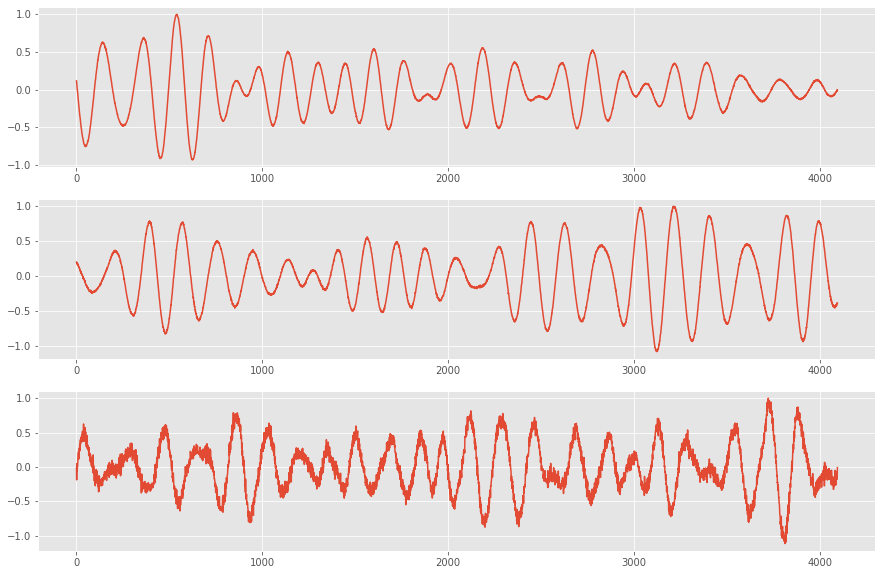

In [99]:
plt.style.use('ggplot')
plt.figure(figsize= (15,10))

for i in range(3):
    image = np.load(fnames[1])
    ax = plt.subplot(3,1,i+1)
    image = image[i,:]/np.max(image[i,:])
    plt.plot(image)

In [100]:
df.head()

,id,target
0,00000e74ad,1
1,00001f4945,0
2,0000661522,0
3,00007a006a,0
4,0000a38978,1


In [101]:
df.loc[df['id']=='000c3049e8']

,id,target
113,000c3049e8,0


In [5]:
np.shape(image)

(4096,)

# K  Means Clustering

1) Select k initial points as a first guess for the k groups' centroids, which are defined to be the average position of all the points within a group.

2) Group all n points according to which centroid is closest.

3) Recalculate the k centroids using the groups found in step 2.

4) Repeat steps 2 and 3 until you reach a time at which no observations change groups.

Generate some random data to see what K Mean does

In [6]:
np.random.seed(2)
X = np.zeros((30,2))

X[:10,:] = np.random.randn(10,2)
X[10:20,:] = np.random.randn(10,2) + np.array([4,4])
X[20:,:] = np.random.randn(10,2) + np.array([-5,5])

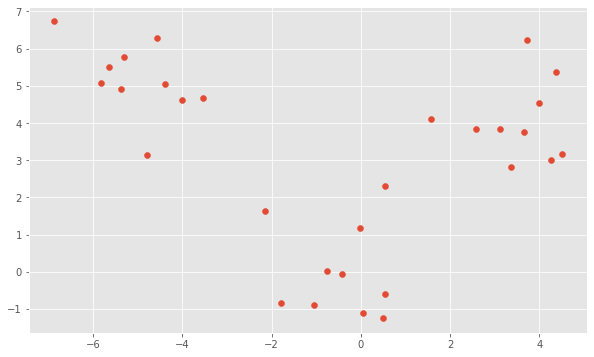

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [8]:
## import KMeans
from sklearn.cluster import KMeans

In [9]:
## Make a KMeans object
## Make a KMeans object
kmeans = KMeans(3)

## Fit the kmeans object
kmeans.fit(X)


## get the clusters
clusters = kmeans.predict(X)

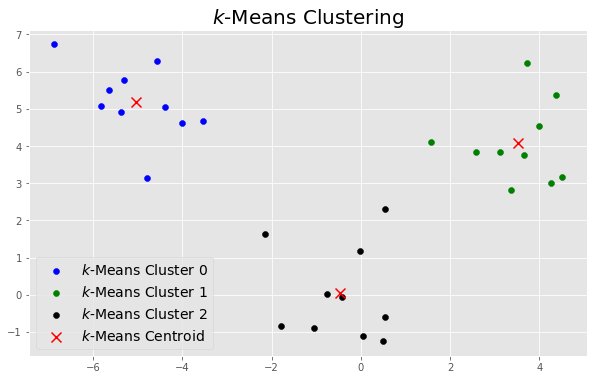

In [10]:
plt.figure(figsize=(10,6))

plt.scatter(X[clusters==0,0], X[clusters==0,1], c='b', label="$k$-Means Cluster 0")
plt.scatter(X[clusters==1,0], X[clusters==1,1], c='green', label="$k$-Means Cluster 1")
plt.scatter(X[clusters==2,0], X[clusters==2,1], c='k', label="$k$-Means Cluster 2")

## You can get the centers with cluster_centers_
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='r', marker='x', s=100, label='$k$-Means Centroid')


plt.legend(fontsize=14)
plt.title("$k$-Means Clustering", fontsize=20)

plt.show()

Load data for GWs

In [69]:
data = np.load(fnames[1])
X_train = np.array([data[1,:]])

In [70]:
X_train

array([[ 2.95792581e-21,  2.90773787e-21,  2.87692821e-21, ...,
        -5.80546988e-21, -5.80899601e-21, -5.71694142e-21]])

In [71]:
data2 = np.load(fnames[2])
X_train = np.append(X_train, [data2[1,:]],axis = 0)

In [72]:
np.shape(X_train) 

(2, 4096)

Generate a X_train to feed in the sklearn object

In [73]:
i=0
while True:
    try:
        data = np.load(fnames[i])
        X_train = np.append(X_train, [data[1, :]],axis = 0)
    except:
        break
    i+=1

In [77]:
np.shape(X_train)

(157, 4096)

Generate a list showing the presense of signal

In [133]:
signal_lst = []
i=0
while True:
    try:
        value = df.loc[df['id']==pde[i][:-4]]['target'].values[0]
        signal_lst = np.append(signal_lst, value)
    except:
        break
    i+=1

In [79]:
## Make a KMeans object
## Make a KMeans object
kmeansGW = KMeans(2)

## Fit the kmeans object
kmeansGW.fit(X_train)


## get the clusters
clustersGW = kmeansGW.predict(X_train)

In [80]:
clustersGW

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0], dtype=int32)

In [102]:
print(df.loc[df['id']=='000c3049e8'])

             id  target
113  000c3049e8       0


In [103]:
print(df.loc[df['id']=='0003c0dea5'])

            id  target
44  0003c0dea5       1


In [132]:
df.loc[df['id']=='0003c0dea5']['target'].values[0]

1

In [134]:
signal_lst

array([0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0.])

In [136]:
print(len(clustersGW), len(signal_lst))

157 155
